# Linear Regression Lesson

## Objectives

By the end of this lesson you will be able to:
- Understand when to use linear regression
- Understand how linear regression relates to the CRISP-DM Model
- Apply linear regression to solve a real-world task
- Interpret the results of a linear regression model

<img src="imgs/talking.jpeg" width="60" align='left'>

#### Turn and Talk - Review

Last week we used t-tests and ANOVA to answer a variety of questions we had related to our data.  With a partner discuss the following:

- In t-tests and ANOVA what are our hypotheses about?
- In t-test and ANOVA what type of variable is our independent and dependent variable?

#### Great, we've done some review of t-tests and ANOVA.  But what if our independent variable is also a continuous variable???  In this case we can use a new type of statistical modeling called Linear Regression!!

<img src="imgs/regression_cat_noclue.jpg" width="300">

## CRoss-Industry Standard Process for Data Mining (CRISP-DM)

Before we dig into regression, lets talk about how this fits into the steps in the CRISP-DM model.

<img src="imgs/new_crisp-dm.png" width="300">

### The basics of Linear Regression


At the basic level linear regression helps us find the "best" linear relationship between an independent variable and dependent variable.

<img src="imgs/linear-nonlinear-relationships.png" width="600">

The model that we "fit" to is noted as:

$$ Y = b_{0} + b_{1}X + \epsilon$$
 
- $ b_{0}$ is the intercept of the model and represents the average Y value when X is 0
- $b_{1}$ is the coefficient of X and represents the slope between X and Y

- $\epsilon$ is the irreducible error term. Depending on the problem at hand we might assume that these errors are coming from measurement mistakes, personal beliefs, recording errors, etc.


<img src="imgs/talking.jpeg" width="60" align='left'>

#### Turn and Talk 

What are two variables (any two that you can dream up) that we might expect to see a linear relationship between?


### Our Problem 

We want to know if there if an increase of alcohol consumption will increase or happiness

<img src="imgs/beer_happy.jpg" width="400">



[Happiness and Alcohol Consuption Dataset](https://www.kaggle.com/marcospessotto/happiness-and-alcohol-consumption)

In [2]:
#import necessary packages
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
#read in dataset
happy = pd.read_csv('HappinessAlcoholConsumption.csv' )
happy.head()

,Unnamed: 0,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,0,Denmark,Europe,north,7.526,928,53.579,224,81,278
1,1,Switzerland,Europe,north,7.509,943,79.866,185,100,280
2,2,Iceland,Europe,north,7.501,933,60.530,233,61,78
3,3,Norway,Europe,north,7.498,951,70.890,169,71,129
4,4,Finland,Europe,north,7.413,918,43.433,263,133,97


Let's do a little exploration of our data before we begin

In [6]:
#look at info of data

happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        117 non-null    int64  
 1   Country           117 non-null    object 
 2   Region            117 non-null    object 
 3   Hemisphere        117 non-null    object 
 4   HappinessScore    117 non-null    float64
 5   HDI               117 non-null    int64  
 6   GDP_PerCapita     117 non-null    float64
 7   Beer_PerCapita    117 non-null    int64  
 8   Spirit_PerCapita  117 non-null    int64  
 9   Wine_PerCapita    117 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 9.3+ KB


In [7]:
#look at descriptive stats
happy.describe()

,Unnamed: 0,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,61.042735,5.508726,741.880342,95.153821,136.717949,96.649573,69.059829
std,35.565722,1.156213,152.339637,213.269748,106.257969,82.502280,89.153228
min,0.000000,3.069000,351.000000,1.029000,1.000000,1.000000,1.000000
25%,31.000000,4.513000,662.000000,4.132000,36.000000,25.000000,5.000000
50%,62.000000,5.528000,766.000000,12.654000,115.000000,84.000000,16.000000
75%,91.000000,6.474000,867.000000,42.349000,225.000000,135.000000,116.000000
max,121.000000,7.526000,951.000000,953.000000,376.000000,373.000000,370.000000


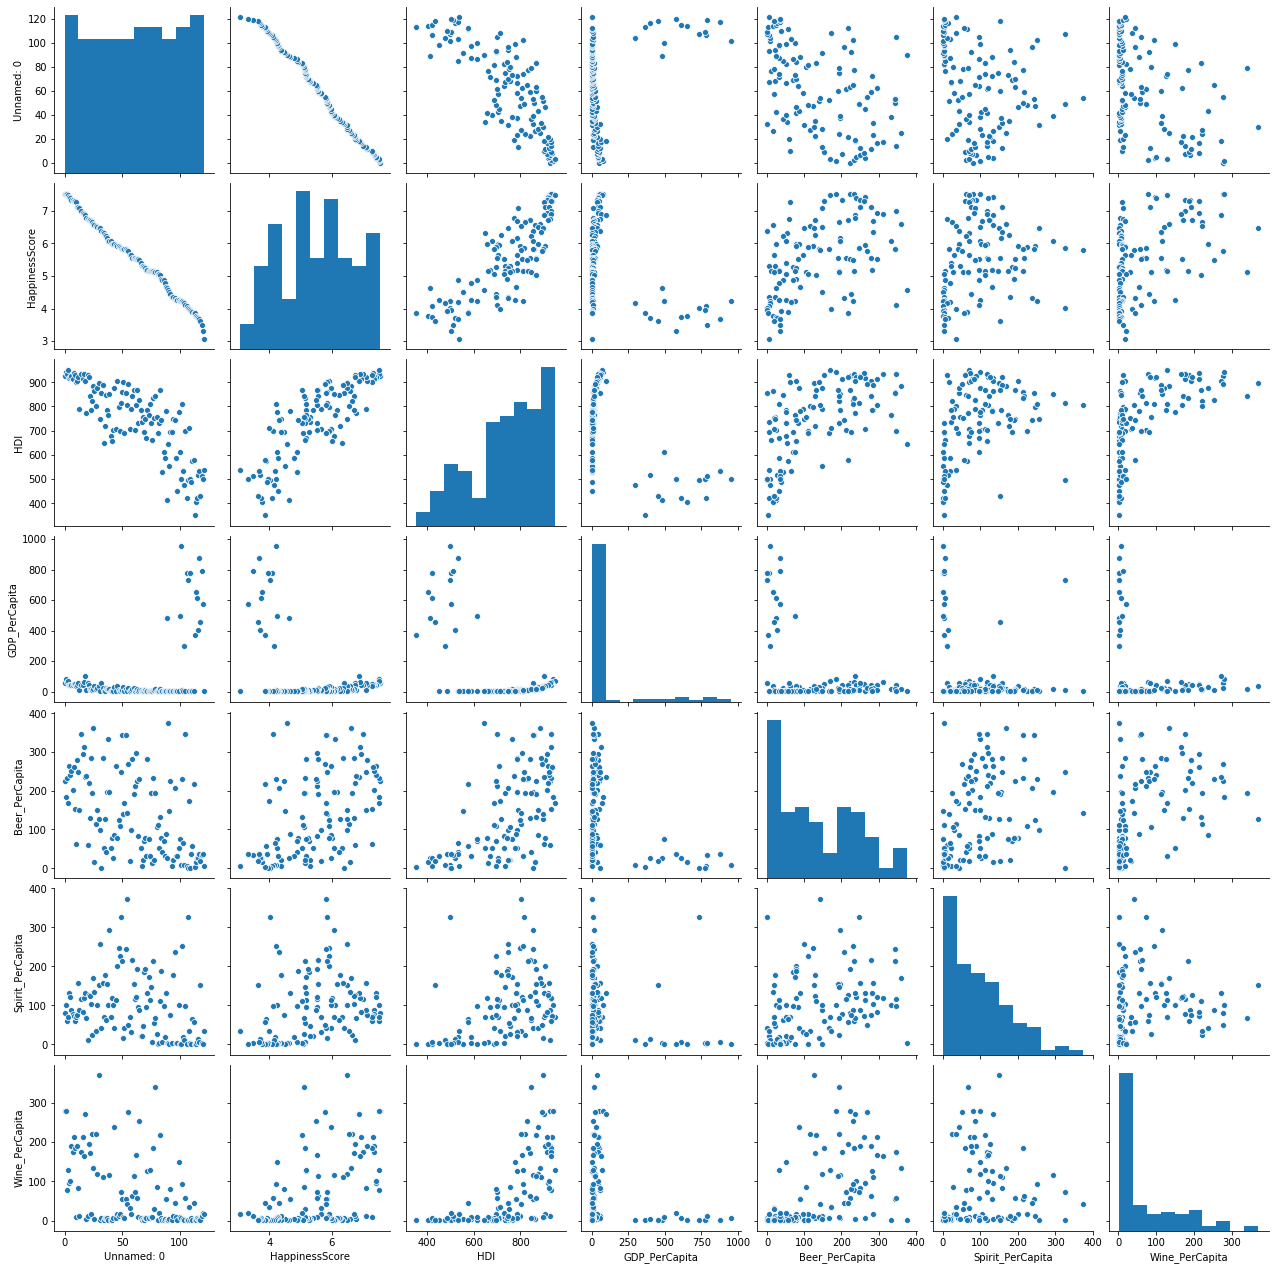

In [8]:
#create a pairplot to visually inspect data
sns.pairplot(happy)

In [9]:
#look at correlations
happy.corr()

,Unnamed: 0,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
Unnamed: 0,1.000000,-0.996218,-0.811535,0.445017,-0.480360,-0.252600,-0.457263
HappinessScore,-0.996218,1.000000,0.820410,-0.454176,0.484375,0.249621,0.469997
HDI,-0.811535,0.820410,1.000000,-0.581453,0.587721,0.389786,0.605848
GDP_PerCapita,0.445017,-0.454176,-0.581453,1.000000,-0.370940,-0.264385,-0.214511
Beer_PerCapita,-0.480360,0.484375,0.587721,-0.370940,1.000000,0.359011,0.486564
Spirit_PerCapita,-0.252600,0.249621,0.389786,-0.264385,0.359011,1.000000,0.118193
Wine_PerCapita,-0.457263,0.469997,0.605848,-0.214511,0.486564,0.118193,1.000000


<img src="imgs/talking.jpeg" width="60" align='left'>

#### Turn and Talk 

Based on a little bit of data exploration what features might we expect would have a linear relationship with happiness?




###  Simple Linear Regression

[StatsModels Formula API](https://www.statsmodels.org/stable/api.html#regression)

Upon visual inspection it looks like HDI is positively linearly related to Happiness.  So lets look at that first.

In [22]:
# first we set up our model
model = smf.ols('HappinessScore ~ HDI', happy) #HappinessScore is our Y variable and HDI is our X

#now we fit the OLS model to our data
model = model.fit()

#finally, we print out the summary table to view the results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     237.7
Date:                Sun, 31 May 2020   Prob (F-statistic):           3.10e-30
Time:                        17:13:25   Log-Likelihood:                -122.91
No. Observations:                 122   AIC:                             249.8
Df Residuals:                     120   BIC:                             255.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8950      0.306      2.921      0.004       0.288       1.502
HDI            0.0062      0.000     15.416      0.000       0.005       0.007
==============================================================================
Omnibus:                        3.079   Durbin-Watson:                   1.371
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                2.572
Skew:                          -0.242   Prob(JB):                        0.276
Kurtosis:                       2.479   Cond. No.                     3.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

####  There are a couple of things we want to interpret here:

- __R-squared__ = 0.664 indicates that HDI can explain 66% of the variance in HappinessScores
- __Intercept Coefficient__ = 0.895 indicates that the mean HappinessScore is .895 when HDI values are 0
- __HDI Coefficient__ = 0.0062 indicates that with a one unit increase in HDI the HappinessScore is expected to increase by 0.0062
    -  The __p value__ of 0.000 also indicates that this is a significant predictor of HappinessScores

###  Multiple Linear Regression

But my question was about drinking and it's impact on Happiness!  So let's add one of the drinking related variables to the model 

In [10]:
# first we set up our model
model = smf.ols('HappinessScore ~ HDI', happy) #Add some other variables here

#now we fit the OLS model to our data

model = model.fit()
#finally, we print out the summary table to view the results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     236.8
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.09e-29
Time:                        10:30:05   Log-Likelihood:                -117.09
No. Observations:                 117   AIC:                             238.2
Df Residuals:                     115   BIC:                             243.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8893      0.306      2.902      0.004       0.282       1.496
HDI            0.0062      0.000     15.387      0.000       0.005       0.007
==============================================================================
Omnibus:                        3.463   Durbin-Watson:                   1.339
Prob(Omnibus):                  0.177   Jarque-Bera (JB):                2.745
Skew:                          -0.249   Prob(JB):                        0.254
Kurtosis:                       2.438   Cond. No.                     3.78e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<img src="imgs/talking.jpeg" width="60" align='left'>

#### Turn and Talk 

Interpret the following:
- R-squared
- Intercept Coefficient
- HDI Coefficient
- Beer Per Capita Coefficient



### ECOMMERCE SALES

Now it's your turn to practice some linear regression using the [Ecommerce Dataset](https://www.kaggle.com/kolawale/focusing-on-mobile-app-or-website)

In [24]:
# your code here